In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Matplotlib is building the font cache; this may take a moment.


In [52]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)

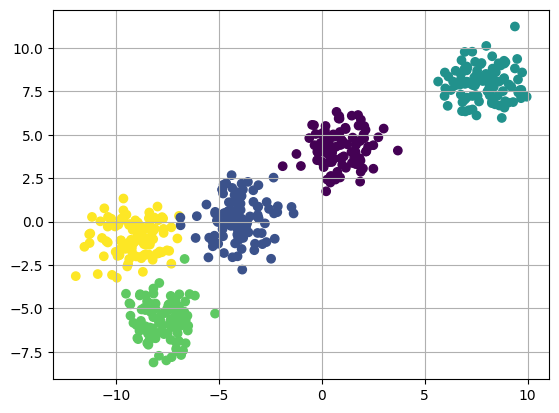

In [54]:
fi = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

In [64]:
k =5
colors = ["green", "yellow", "blue", "red", "violet"]
clusters = {}
for idx in range(k):
    center = 10*(2*np.random.random((x.shape[1],)) -1)
    points = []
    cluster = {
        'center ' : center,
        'points' : [],
        'color' : colors[idx]
    }
    clusters[idx] = cluster

In [66]:
print(clusters)

{0: {'centers ': array([ 2.79539436, -8.73636133]), 'points': [], 'color': 'green'}, 1: {'centers ': array([-9.89839003,  9.30680081]), 'points': [], 'color': 'yellow'}, 2: {'centers ': array([ 0.64473323, -8.30072566]), 'points': [], 'color': 'blue'}, 3: {'centers ': array([-7.79317115,  2.65229771]), 'points': [], 'color': 'red'}, 4: {'centers ': array([7.68025189, 6.47676775]), 'points': [], 'color': 'violet'}}


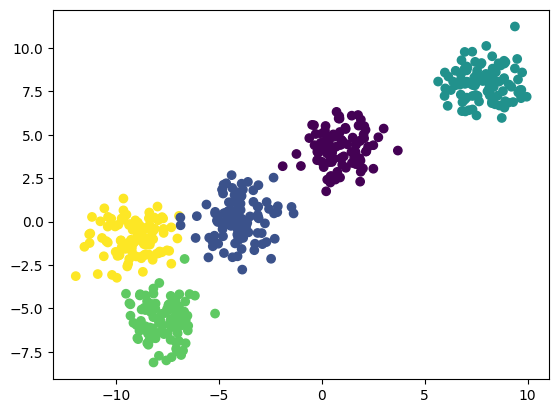

In [164]:
plt.scatter(X[:,0],X[:,1],c=y)
for i, cluster in clusters.items():  # Use .items() if clusters is a dictionary
    centers = cluster.get('centers')
    if center is not None:  # Only plot if 'center' exists
        plt.scatter(centers[0], centers[1], marker='^', c='red')
plt.show()

In [166]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [168]:
clusters

{0: {'centers ': array([ 2.79539436, -8.73636133]),
  'points': [],
  'color': 'green'},
 1: {'centers ': array([-9.89839003,  9.30680081]),
  'points': [],
  'color': 'yellow'},
 2: {'centers ': array([ 0.64473323, -8.30072566]),
  'points': [],
  'color': 'blue'},
 3: {'centers ': array([-7.79317115,  2.65229771]),
  'points': [],
  'color': 'red'},
 4: {'centers ': array([7.68025189, 6.47676775]),
  'points': [],
  'color': 'violet'}}

In [170]:
a = np.array([1,2])
b = np.array([3,4])
distance(a,b)

2.8284271247461903

In [172]:
def assign_clusters():
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['centers'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
        
        
        
#Implementing the M-Step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            new_center = pts.mean(axis =0)
            clusters[idx]['centers'] = new_center
            
            clusters[idx]['points'] = []
    
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try : 
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        centers = clusters[i]['centers']
        plt.scatter(centers[0],centers[1],c = 'black',marker = '^')

## Scikit Learn K - Means

from sklearn.cluster import KMeans

In [142]:
km = KMeans(n_clusters = 5)

In [144]:
X,y = make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)

In [146]:
km.fit(X, y)

C:\Users\achyu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\achyu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5)

In [148]:
centers = km.cluster_centers_

In [150]:
labels = km.labels_

In [152]:
labels

array([0, 2, 3, 0, 0, 3, 4, 0, 2, 0, 2, 3, 2, 0, 3, 0, 2, 0, 0, 2, 1, 1,
       0, 3, 0, 1, 4, 4, 3, 4, 0, 4, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 4, 4,
       3, 2, 2, 4, 4, 4, 2, 0, 4, 0, 0, 1, 0, 0, 2, 3, 2, 3, 3, 0, 4, 2,
       3, 3, 1, 3, 1, 0, 1, 0, 1, 3, 0, 4, 1, 1, 3, 1, 3, 4, 2, 4, 3, 2,
       4, 3, 4, 1, 0, 1, 1, 2, 0, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 3, 3, 0,
       2, 4, 0, 2, 3, 1, 2, 4, 1, 3, 2, 3, 4, 0, 1, 4, 4, 4, 0, 0, 3, 3,
       0, 2, 2, 4, 3, 4, 3, 0, 0, 1, 3, 2, 4, 0, 2, 2, 0, 3, 0, 0, 3, 3,
       2, 1, 1, 4, 3, 0, 1, 2, 4, 1, 2, 1, 2, 1, 1, 1, 4, 0, 1, 2, 1, 4,
       0, 3, 2, 4, 2, 0, 2, 1, 4, 4, 1, 0, 3, 2, 1, 3, 4, 0, 4, 1, 3, 4,
       0, 0, 0, 1, 1, 2, 0, 4, 4, 0, 2, 0, 0, 0, 1, 2, 3, 2, 0, 0, 2, 4,
       3, 4, 4, 1, 0, 3, 0, 3, 4, 1, 3, 3, 0, 1, 0, 1, 3, 2, 3, 1, 1, 2,
       0, 0, 3, 3, 1, 2, 1, 0, 4, 2, 4, 0, 4, 4, 4, 4, 2, 1, 2, 0, 1, 2,
       4, 3, 2, 2, 2, 4, 0, 0, 3, 1, 1, 2, 3, 3, 0, 3, 4, 3, 2, 2, 4, 4,
       1, 4, 4, 2, 1, 0, 3, 1, 3, 4, 3, 3, 2, 0, 1,

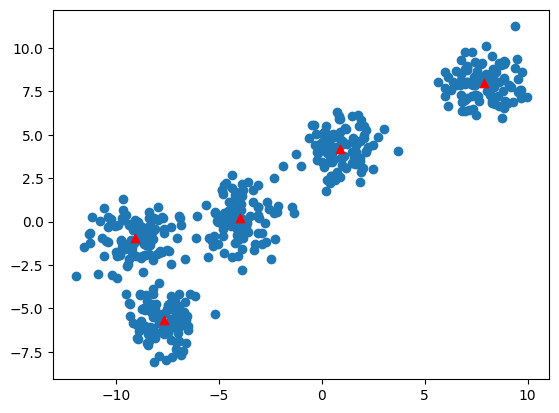

In [160]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0], centers[:, 1], marker='^', c='red')
plt.show()